## Mini Project III

In [2]:
# Import necessary libraries 

import numpy as np
import pandas as pd
import plotly.express as px
#import sklearn
import matplotlib.pyplot as plt
from sklearn import preprocessing


In [3]:
def plot_dendrogram(X,method ='ward'):
    dendrogram = sch.dendrogram(sch.linkage(X, method=method))
    plt.title("Dendrogram")
    plt.ylabel("Euclidean distances")
    plt.xlabel('Points')
    plt.show()

In [5]:
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

In [6]:
twm_cus0 = pd.read_csv('twm_customer.csv',sep= ";")

twm_acc0 = pd.read_csv('twm_accounts.csv', sep= ";")
twm_acc1ch = pd.read_csv('twm_checking_acct.csv',sep= ";")
twm_acc1sa = pd.read_csv('twm_savings_acct.csv',sep= ";")
twm_acc1cr = pd.read_csv('twm_credit_acct.csv',sep= ";")

twm_tra0 = pd.read_csv('twm_transactions.csv', sep= ";")
twm_tra1ch = pd.read_csv('twm_checking_tran.csv',sep= ";")
twm_tra1sa = pd.read_csv('twm_savings_tran.csv',sep= ";")
twm_tra1cr = pd.read_csv('twm_credit_tran.csv',sep= ";")

In [ ]:
#In this miniproject, we will:

#1.  create two separate customer segmentations (using clustering) to split them into 3-5 clusters: 
    #- based on demographics (only on the information from twm_customer)
    #- based on their banking behavior. We can take following things into consideration as banking behavior:
       # - do they have savings account? How much do they save?
        #- do they have credit account? How much do they live in debt?
        #- are they making lot of small transactions or few huge ones?

In [7]:
#(pd.merge(df1, df2.rename(columns={'id1':'id'}), on='id',  how='left'))

In [7]:
twm_acc0['acct_type'].value_counts()

CK      520
CC      468
SV      421
Name: acct_type, dtype: int64

In [8]:
twm_acc1ch['acct_type'] = 'CK' 
twm_acc1sa['acct_type'] = 'SV'
twm_acc1cr['acct_type'] = 'CC'

In [9]:
twm_tra1ch['acct_type'] = 'CK' 
twm_tra1sa['acct_type'] = 'SV'
twm_tra1cr['acct_type'] = 'CC'

In [10]:
twm_tra_con=pd.concat([twm_tra1ch, twm_tra1sa, twm_tra1cr])
#twm_tra_con1=twm_tra_con[['acct_nbr','per_check_fee', 'credit_limit', 'credit_rating']]
#TRA=twm_tra0.merge(twm_tra_con, on='tran_id')

In [11]:
twm_acc_con=pd.concat([twm_acc1ch, twm_acc1sa, twm_acc1cr])
twm_acc_con1=twm_acc_con[['acct_nbr','per_check_fee', 'credit_limit', 'credit_rating']]
ACC=twm_acc0.merge(twm_acc_con1, on='acct_nbr')

In [12]:
ACC.head()

,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance,per_check_fee,credit_limit,credit_rating
0,13628063,1362806,SV,Y,10.12.1995,NaN,1430.22,284.58,NaN,NaN,NaN
1,4561143213627090,1362709,CC,Y,15.3.1993,NaN,266.34,496.15,NaN,1000.0,0.0
2,4561143213628360,1362836,CC,Y,18.3.1992,NaN,55.90,1000.00,NaN,1000.0,0.0
3,13633112,1363311,CK,Y,6.7.1995,NaN,11017.13,968.46,0.0,NaN,NaN
4,4561143213633610,1363361,CC,Y,17.6.1994,NaN,849.37,462.28,NaN,1300.0,0.0


In [13]:
df_clean = twm_acc0[['acct_nbr', 'cust_id', 'acct_type','starting_balance','ending_balance']]
trans_acc = twm_tra0.merge(df_clean, on='acct_nbr')
trans_acc.head()

,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code,cust_id,acct_type,starting_balance,ending_balance
0,27,13625623,0.00,0.00,0.00,3753.34,21.10.1995,121656,A,IQ,1362562,SV,391.96,3864.77
1,39,13625623,140.63,140.63,0.00,3859.95,27.12.1995,170033,B,DP,1362562,SV,391.96,3864.77
2,2,13625623,0.49,0.00,0.49,392.94,28.2.1995,235959,,IN,1362562,SV,391.96,3864.77
3,14,13625623,-120.00,-120.00,0.00,2253.68,6.8.1995,204727,A,WD,1362562,SV,391.96,3864.77
4,26,13625623,-140.00,-140.00,0.00,3753.34,21.10.1995,121543,A,WD,1362562,SV,391.96,3864.77


In [14]:
twm_acc0.head()

,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,13628063,1362806,SV,Y,10.12.1995,NaN,1430.22,284.58
1,4561143213627090,1362709,CC,Y,15.3.1993,NaN,266.34,496.15
2,4561143213628360,1362836,CC,Y,18.3.1992,NaN,55.90,1000.00
3,13633112,1363311,CK,Y,6.7.1995,NaN,11017.13,968.46
4,4561143213633610,1363361,CC,Y,17.6.1994,NaN,849.37,462.28


In [15]:
df_check= twm_acc0[['cust_id','acct_type','starting_balance','ending_balance']]

In [16]:
df_check1 = df_check[df_check['acct_type'].str.contains('CK')]

In [17]:
df_check1['ck_var'] = df_check1['starting_balance'] - df_check1['ending_balance']

<ipython-input-17-437fb5a14e8d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_check1['ck_var'] = df_check1['starting_balance'] - df_check1['ending_balance']


In [18]:
df_check1

,cust_id,acct_type,starting_balance,ending_balance,ck_var
3,1363311,CK,11017.13,968.46,10048.67
7,1362897,CK,152.12,52.33,99.79
9,1362720,CK,1074.16,216.74,857.42
11,1362945,CK,204.67,375.14,-170.47
18,1362591,CK,3390.49,920.44,2470.05
...,...,...,...,...,...
1386,1362985,CK,1067.03,65.82,1001.21
1390,1363008,CK,4914.54,23.16,4891.38
1391,1362742,CK,2647.42,2562.66,84.76
1403,1362602,CK,428.90,626.79,-197.89


In [19]:
trans_acc1= trans_acc.copy()
trans_acc1['tran_amt'] = trans_acc['tran_amt'].replace(0,np.NaN)
trans_acc1.dropna(inplace=True)


In [22]:
ck_compact['cust_id'] = ck_compact['cust_id'] - 1360000

<ipython-input-22-d7b7f0e1e799>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ck_compact['cust_id'] = ck_compact['cust_id'] - 1360000


In [21]:
ck_compact=df_check1[['cust_id','ck_var']]

In [23]:
ck_compact

,cust_id,ck_var
3,3311,10048.67
7,2897,99.79
9,2720,857.42
11,2945,-170.47
18,2591,2470.05
...,...,...
1386,2985,1001.21
1390,3008,4891.38
1391,2742,84.76
1403,2602,-197.89


In [24]:
acc_var = df_feat.merge(cc_compact,how='left', on='cust_id')
acc_var = acc_var.merge(ck_compact, on='cust_id', how='left')
acc_var = acc_var.merge(sv_compact, on='cust_id', how='left')

NameError: name 'df_feat' is not defined

In [25]:
acc_var_clean=acc_var.drop_duplicates('acct_nbr')

NameError: name 'acc_var' is not defined

In [26]:
acc_var_clean.to_csv('clean.csv')

NameError: name 'acc_var_clean' is not defined

In [27]:
for index,row in acc_var_clean.iterrows():
    if 'SV' in row["acct_type"]:
        acc_var_clean.loc[index,"cc_var"] = np.NaN
        acc_var_clean.loc[index,"ck_var"] = np.NaN
    elif 'CK' in row["acct_type"]:
        acc_var_clean.loc[index,"cc_var"] = np.NaN
        acc_var_clean.loc[index,"sv_var"] = np.NaN
    elif 'CC' in row["acct_type"]:
        acc_var_clean.loc[index,"ck_var"] = np.NaN
        acc_var_clean.loc[index,"sv_var"] = np.NaN
    

NameError: name 'acc_var_clean' is not defined

In [28]:
for index,row in acc_var_clean.iterrows():
    if 'SV' in row["acct_type"]:
        acc_var_clean.loc[index,"acct_type"] = 1
    elif 'CK' in row["acct_type"]:
        acc_var_clean.loc[index,"acct_type"] = 2
    elif 'CC' in row["acct_type"]:
        acc_var_clean.loc[index,"acct_type"] = 3

NameError: name 'acc_var_clean' is not defined

In [541]:
acc_var_clean

,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,cust_id,acct_type,starting_balance,ending_balance,cc_var,ck_var,sv_var
0,39,13625623,140.63,140.63,0.00,2562,1,391.96,3864.77,NaN,NaN,-3472.81
36,21,13628392,-72.10,-72.10,0.00,2839,2,8885.44,32.80,NaN,8852.64,NaN
116,21,13630842,-97.57,-97.57,0.00,3084,2,4473.55,1909.09,NaN,2564.46,NaN
194,44,13631412,-0.15,-0.15,0.00,3141,2,142.78,563.15,NaN,-420.37,NaN
275,75,13625722,-0.15,-0.15,0.00,2572,2,244.50,1.97,NaN,242.53,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
66562,51,4561143213633900,-83.77,-83.77,0.00,3390,3,0.00,1860.67,-1860.67,NaN,NaN
66607,39,13627012,-223.10,-223.10,0.00,2701,2,217.14,223.09,NaN,-5.95,NaN
66640,1,13629502,-0.75,-0.75,0.00,2950,2,163.97,163.22,NaN,0.75,NaN
66641,9,13627173,0.23,0.00,0.23,2717,1,184.03,186.79,NaN,NaN,-2.76


In [534]:
label_dict = {1: 'SV', 2: 'CK', 3:'CC'}
f = acc_var_clean['acct_type'].values
enc = preprocessing.LabelEncoder()
label_encoder = enc.fit(f)
f = label_encoder.transform(f) + 1

In [ ]:
sv_compact = trans_sv_acc[['cust_id', 'sv_var']]

In [506]:
acc_var

,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,cust_id,acct_type,starting_balance,ending_balance,cc_var,sv_var,ck_var_x,ck_var_y
0,39,13625623,140.63,140.63,0.00,2562,SV,391.96,3864.77,-9500.0,-3472.81,NaN,2475.92
1,2,13625623,0.49,0.00,0.49,2562,SV,391.96,3864.77,-9500.0,-3472.81,NaN,2475.92
2,14,13625623,-120.00,-120.00,0.00,2562,SV,391.96,3864.77,-9500.0,-3472.81,NaN,2475.92
3,26,13625623,-140.00,-140.00,0.00,2562,SV,391.96,3864.77,-9500.0,-3472.81,NaN,2475.92
4,1,13625623,0.49,0.00,0.49,2562,SV,391.96,3864.77,-9500.0,-3472.81,NaN,2475.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66668,22,13629413,1019.58,1019.58,0.00,2941,SV,149.15,877.14,NaN,-727.99,NaN,318.52
66669,24,13629413,-179.33,-179.33,0.00,2941,SV,149.15,877.14,NaN,-727.99,NaN,318.52
66670,25,13629413,-192.83,-192.83,0.00,2941,SV,149.15,877.14,NaN,-727.99,NaN,318.52
66671,26,13629413,1.25,0.00,1.25,2941,SV,149.15,877.14,NaN,-727.99,NaN,318.52


In [465]:
df_main

,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,cust_id,acct_type,starting_balance,ending_balance,sb_cc,eb_cc,cc_var
0,39,13625623,140.63,140.63,0.00,1362562,SV,391.96,3864.77,0.00,9500.0,-9500.00
1,2,13625623,0.49,0.00,0.49,1362562,SV,391.96,3864.77,0.00,9500.0,-9500.00
2,14,13625623,-120.00,-120.00,0.00,1362562,SV,391.96,3864.77,0.00,9500.0,-9500.00
3,26,13625623,-140.00,-140.00,0.00,1362562,SV,391.96,3864.77,0.00,9500.0,-9500.00
4,1,13625623,0.49,0.00,0.49,1362562,SV,391.96,3864.77,0.00,9500.0,-9500.00
...,...,...,...,...,...,...,...,...,...,...,...,...
53697,2,4561143213630960,30.65,29.89,0.76,1363096,CC,388.35,0.00,388.35,0.0,388.35
53698,1,4561143213630960,339.52,334.05,5.47,1363096,CC,388.35,0.00,388.35,0.0,388.35
53699,5,4561143213630960,5.30,4.96,0.07,1363096,CC,388.35,0.00,388.35,0.0,388.35
53700,4,4561143213630960,10.00,9.79,0.21,1363096,CC,388.35,0.00,388.35,0.0,388.35


In [476]:
#cc_compact = trans_cc_clean[['cust_id', 'cc_var']]
trans_sv_acc['sv_var'] = trans_sv_acc['starting_balance'] - trans_sv_acc['ending_balance']

<ipython-input-476-7d5c1558265f>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [493]:
acc_var_clean = acc_var.drop_duplicates('acct_nbr')

In [497]:
acc_var_clean['ck_var'].value_counts()

Series([], Name: ck_var, dtype: int64)

In [496]:
f1
acc_var_clean1 = acc_var_clean[acc_var_clean['acct_type'].str.contains('CK')]

,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,cust_id,acct_type,starting_balance,ending_balance,cc_var,sv_var,ck_var
0,39,13625623,140.63,140.63,0.00,2562,SV,391.96,3864.77,-9500.00,-3472.81,NaN
36,21,13628392,-72.10,-72.10,0.00,2839,CK,8885.44,32.80,-142.74,966.29,NaN
116,21,13630842,-97.57,-97.57,0.00,3084,CK,4473.55,1909.09,-1700.00,NaN,NaN
194,44,13631412,-0.15,-0.15,0.00,3141,CK,142.78,563.15,NaN,-351.24,NaN
275,75,13625722,-0.15,-0.15,0.00,2572,CK,244.50,1.97,9.29,-230.34,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
66562,51,4561143213633900,-83.77,-83.77,0.00,3390,CC,0.00,1860.67,-1860.67,-487.49,NaN
66607,39,13627012,-223.10,-223.10,0.00,2701,CK,217.14,223.09,NaN,-1600.24,NaN
66640,1,13629502,-0.75,-0.75,0.00,2950,CK,163.97,163.22,-162.95,-886.96,NaN
66641,9,13627173,0.23,0.00,0.23,2717,SV,184.03,186.79,-1000.00,-2.76,NaN


In [466]:
df_feat = trans_acc1.copy()
df_feat.drop(columns=['new_balance','tran_date','tran_time','channel','tran_code'], inplace =True)
df_feat.head()
df_feat['cust_id'] = df_feat['cust_id'] - 1360000

In [467]:
df_feat

,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,cust_id,acct_type,starting_balance,ending_balance
1,39,13625623,140.63,140.63,0.00,2562,SV,391.96,3864.77
2,2,13625623,0.49,0.00,0.49,2562,SV,391.96,3864.77
3,14,13625623,-120.00,-120.00,0.00,2562,SV,391.96,3864.77
4,26,13625623,-140.00,-140.00,0.00,2562,SV,391.96,3864.77
6,1,13625623,0.49,0.00,0.49,2562,SV,391.96,3864.77
...,...,...,...,...,...,...,...,...,...
77554,22,13629413,1019.58,1019.58,0.00,2941,SV,149.15,877.14
77556,24,13629413,-179.33,-179.33,0.00,2941,SV,149.15,877.14
77557,25,13629413,-192.83,-192.83,0.00,2941,SV,149.15,877.14
77558,26,13629413,1.25,0.00,1.25,2941,SV,149.15,877.14


In [475]:
acc_var

,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,cust_id,acct_type,starting_balance,ending_balance,cc_var
0,39,13625623,140.63,140.63,0.00,2562,SV,391.96,3864.77,-9500.0
1,2,13625623,0.49,0.00,0.49,2562,SV,391.96,3864.77,-9500.0
2,14,13625623,-120.00,-120.00,0.00,2562,SV,391.96,3864.77,-9500.0
3,26,13625623,-140.00,-140.00,0.00,2562,SV,391.96,3864.77,-9500.0
4,1,13625623,0.49,0.00,0.49,2562,SV,391.96,3864.77,-9500.0
...,...,...,...,...,...,...,...,...,...,...
66668,22,13629413,1019.58,1019.58,0.00,2941,SV,149.15,877.14,NaN
66669,24,13629413,-179.33,-179.33,0.00,2941,SV,149.15,877.14,NaN
66670,25,13629413,-192.83,-192.83,0.00,2941,SV,149.15,877.14,NaN
66671,26,13629413,1.25,0.00,1.25,2941,SV,149.15,877.14,NaN


In [454]:
df_cc = twm_acc1cr[['cust_id', 'starting_balance', 'ending_balance']]
df_cc['cc_var'] = df_cc['starting_balance'] - df_cc['ending_balance']
df_cc.rename(columns = {'starting_balance':'sb_cc', 'ending_balance': 'eb_cc'}, inplace = True)

df_main = df_feat.merge(df_cc, on='cust_id')

trans_cc = df_main[df_main['acct_type'].str.contains('CC')]
trans_cc_clean = trans_cc.drop_duplicates('cust_id')
trans_cc_clean['cust_id'].value_counts()
trans_cc_clean['cust_id'] = trans_cc_clean['cust_id'] - 1360000

<ipython-input-454-788dd0a77e3c>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\tokis\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-454-788dd0a77e3c>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [471]:
df_main.shape

(53702, 12)

In [455]:
trans_cc_clean

,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,cust_id,acct_type,starting_balance,ending_balance,sb_cc,eb_cc,cc_var
114,11,4561143213625620,-160.00,-160.00,0.00,2562,CC,0.00,9500.00,0.00,9500.00,-9500.00
219,83,4561143213628390,-84.51,-84.51,0.00,2839,CC,3640.88,3783.62,3640.88,3783.62,-142.74
435,11,4561143213630840,148.56,147.03,1.53,3084,CC,0.00,1700.00,0.00,1700.00,-1700.00
527,39,4561143213625720,-223.20,-223.20,0.00,2572,CC,379.26,369.97,379.26,369.97,9.29
681,2,4561143213631640,63.65,56.94,6.71,3164,CC,476.61,1200.00,476.61,1200.00,-723.39
...,...,...,...,...,...,...,...,...,...,...,...,...
53549,20,4561143213631350,-205.74,-205.74,0.00,3135,CC,3139.52,247.32,3139.52,247.32,2892.20
53583,69,4561143213630160,-200.00,-200.00,0.00,3016,CC,1219.77,1223.77,1219.77,1223.77,-4.00
53651,47,4561143213630440,-29.95,-29.95,0.00,3044,CC,150.30,523.08,150.30,523.08,-372.78
53696,3,4561143213630960,10.00,9.66,0.34,3096,CC,388.35,0.00,388.35,0.00,388.35


In [451]:
trans_cc_acc

,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code,cust_id,acct_type,starting_balance,ending_balance
634,25,4561143213634590,-420.60,-420.60,0.00,-2142.46,14.12.1995,110142,E,CG,1363459,CC,0.00,3000.00
1291,54,4561143213625470,-153.52,-153.52,0.00,-1354.47,10.11.1995,204225,E,CG,1362547,CC,0.00,952.52
1356,69,4561143213634000,-200.00,-200.00,0.00,-1912.60,30.10.1995,191749,A,CA,1363400,CC,3293.54,2186.72
2052,29,4561143213629380,-125.59,-125.59,0.00,-346.45,24.6.1995,144350,E,CG,1362938,CC,1402.32,436.98
2117,38,4561143213629110,-201.78,-201.78,0.00,-2101.43,17.9.1995,84038,E,CG,1362911,CC,1328.83,67.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77271,1,4561143213626190,3905.04,3866.70,38.34,0.00,2.1.1995,162535,A,PM,1362619,CC,3866.70,0.00
77272,1,4561143213633530,371.22,365.66,5.56,-114.00,2.1.1995,0,M,PM,1363353,CC,479.66,1504.14
77380,1,4561143213634490,1005.84,991.87,13.97,0.00,1.1.1995,0,M,PM,1363449,CC,991.87,636.53
77429,1,4561143213631690,1749.60,1729.57,20.30,0.00,4.1.1995,0,M,PM,1363169,CC,1729.57,0.00


In [ ]:
#trans_cc=trans_acc1[trans_acc1['acct_type'].str.contains('CC')]
#trans_cc_acc=trans_cc.drop_duplicates(subset=['acct_nbr'])####!!!!!!!!!!!!!!!!!!!!
#trans_cc_acc_g=trans_cc_acc.groupby(['acct_nbr'])['ending_balance']

In [ ]:
trans_acc1.count()

In [420]:
trans_sv=trans_acc1[trans_acc1['acct_type'].str.contains('SV')]
trans_sv_acc=trans_sv.drop_duplicates(subset=['acct_nbr'])####!!!!!!!!!!!!!!!!!!!!
trans_sv_acc_g=trans_sv_acc.groupby(['acct_nbr'])['ending_balance']

In [423]:
trans_sv_acc['cust_id']=trans_sv_acc['cust_id']-1360000

<ipython-input-423-87fbb12403fe>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [456]:
trans_sv_acc

,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code,cust_id,acct_type,starting_balance,ending_balance
0,27,13625623,NaN,0.00,0.00,3753.34,21.10.1995,121656,A,IQ,2562,SV,391.96,3864.77
926,45,13632573,-200.00,-200.00,0.00,353.11,3.12.1995,90525,A,WD,3257,SV,273.21,1209.67
1440,23,13628153,-129.92,-129.92,0.00,576.09,12.12.1995,110610,B,WD,2815,SV,594.33,348.98
2549,29,13626613,113.49,113.49,0.00,1885.06,14.12.1995,155812,A,DP,2661,SV,818.48,2226.62
3441,30,13632723,-605.59,-605.59,0.00,1109.98,25.11.1995,120705,C,TR,3272,SV,165.83,711.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77036,21,13629333,0.02,0.00,0.02,17.18,31.12.1995,235959,,IN,2933,SV,268.67,17.18
77233,1,13629933,0.18,0.00,0.18,147.86,31.1.1995,235959,,IN,2993,SV,147.68,435.70
77341,1,13625253,-142.32,-142.32,0.00,142.33,5.1.1995,200237,V,TR,2525,SV,284.65,313.46
77521,9,13627173,0.23,0.00,0.23,186.10,30.9.1995,235959,,IN,2717,SV,184.03,186.79


In [394]:
trans_sv_acc['balance_difference']=trans_sv_acc.ending_balance-trans_sv_acc.starting_balance

In [ ]:
trans_sv_acc

In [318]:
trans_acc1[f1]

,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code,cust_id,acct_type,ending_balance


In [299]:
trans_acc1.cust_id.value_counts()

1363002    232
1363236    229
1362839    218
1362978    214
1362858    204
          ... 
1363383      7
1363096      5
1363351      4
1363146      1
1362535      1
Name: cust_id, Length: 663, dtype: int64

In [300]:
trans_acc2=trans_acc1.groupby(['cust_id'])['ending_balance'].max()

In [546]:
acc_var_clean.fillna(0,inplace=True)

C:\Users\tokis\anaconda3\lib\site-packages\pandas\core\frame.py:4147: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,cust_id,acct_type,starting_balance,ending_balance,cc_var,ck_var,sv_var
0,39,13625623,140.63,140.63,0.00,2562,1,391.96,3864.77,NaN,NaN,-3472.81
36,21,13628392,-72.10,-72.10,0.00,2839,2,8885.44,32.80,NaN,8852.64,NaN
116,21,13630842,-97.57,-97.57,0.00,3084,2,4473.55,1909.09,NaN,2564.46,NaN
194,44,13631412,-0.15,-0.15,0.00,3141,2,142.78,563.15,NaN,-420.37,NaN
275,75,13625722,-0.15,-0.15,0.00,2572,2,244.50,1.97,NaN,242.53,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
66562,51,4561143213633900,-83.77,-83.77,0.00,3390,3,0.00,1860.67,-1860.67,NaN,NaN
66607,39,13627012,-223.10,-223.10,0.00,2701,2,217.14,223.09,NaN,-5.95,NaN
66640,1,13629502,-0.75,-0.75,0.00,2950,2,163.97,163.22,NaN,0.75,NaN
66641,9,13627173,0.23,0.00,0.23,2717,1,184.03,186.79,NaN,NaN,-2.76


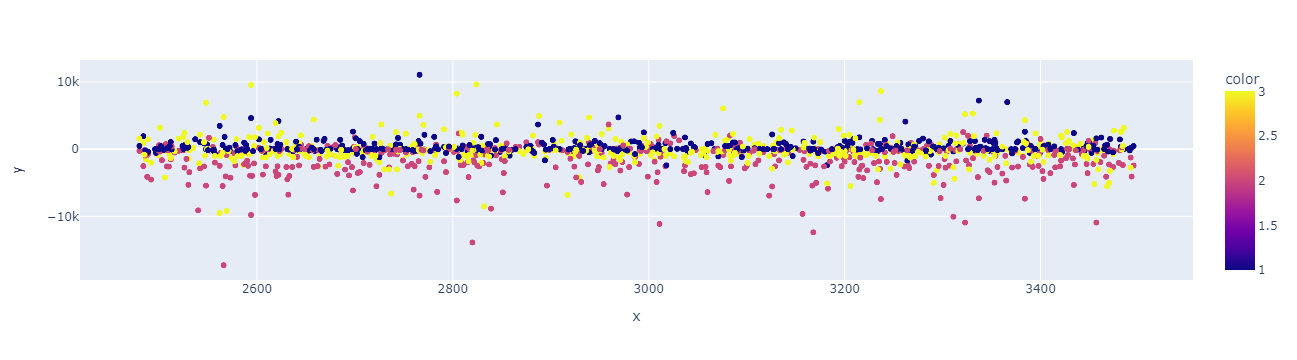

In [567]:
x = acc_var_clean['cust_id']
y = acc_var_clean['cc_var']-acc_var_clean['ck_var']-acc_var_clean['sv_var']
fig = px.scatter(x=x, y=y, color = acc_var_clean.acct_type)
fig.show()

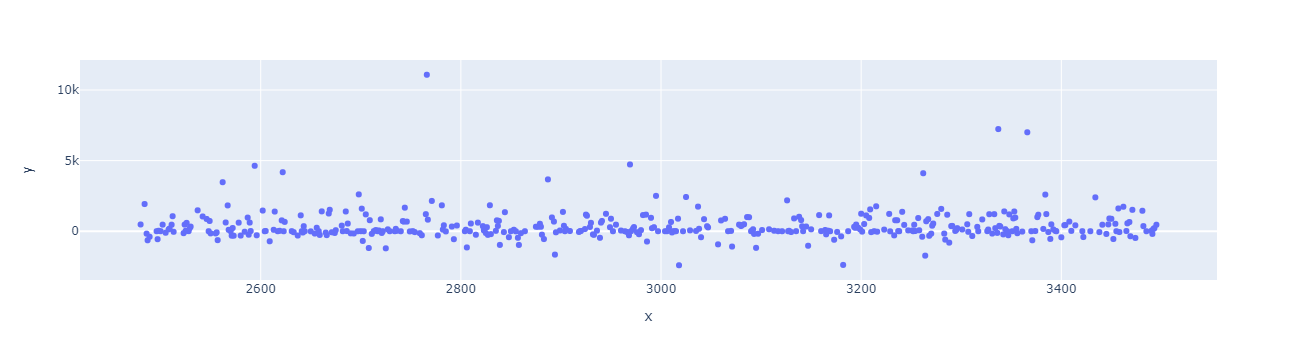

In [402]:
x = trans_sv_acc['cust_id']
y = trans_sv_acc['balance_difference']
fig = px.scatter(x=x, y=y)
fig.show()

In [572]:
acc_var_clean.reset_index(inplace=True)

In [191]:
trans_acc['acct_type'].value_counts()

CK      46204
CC      20167
SV      11189
Name: acct_type, dtype: int64

In [575]:
acc_var_clean.drop(['index'])

KeyError: "['index'] not found in axis"

In [146]:
#twm_cus0_trim3=twm_cus0_trim2.dropna()

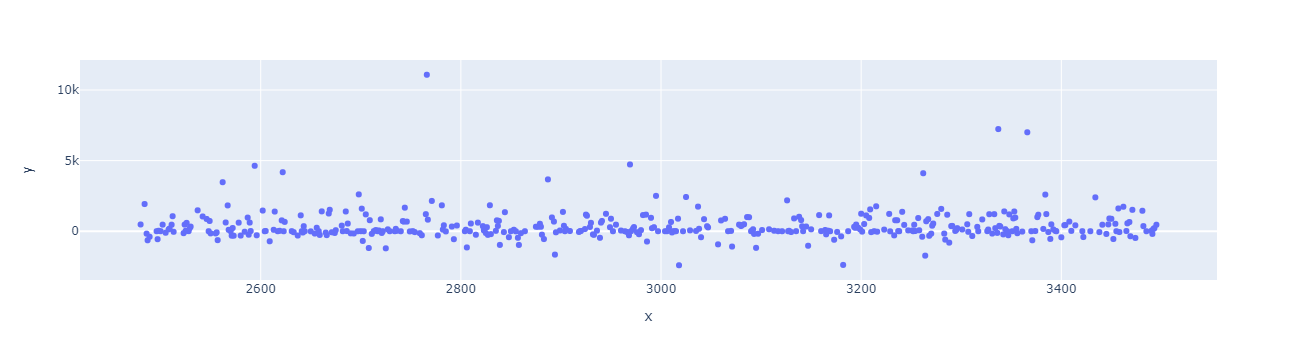

In [405]:
x = trans_sv_acc['cust_id']
y =  trans_sv_acc['ending_balance'] -trans_sv_acc['starting_balance']
fig = px.scatter(x=x, y=y)
fig.show()

In [570]:
df_

,3472.81,-8852.64,-2564.46,420.37,-242.53,-1640.56,-3.02,-3000.00,-109.58,-113.77,...,3866.70,-1024.48,28.81,355.34,1729.57,-1860.67,5.95,-0.75,2.76,727.99
0,0,36,116,194,275,351,431,518,546,622,...,66413,66414,66479,66514,66561,66562,66607,66640,66641,66653


In [571]:
y

0        3472.81
36      -8852.64
116     -2564.46
194       420.37
275      -242.53
          ...   
66562   -1860.67
66607       5.95
66640      -0.75
66641       2.76
66653     727.99
Length: 1396, dtype: float64

In [568]:
import scipy.cluster.hierarchy as sch
df_ = pd.DataFrame(x.index,y).T
X = np.array(df_).astype(float)

In [569]:
plot_dendrogram(X)

ValueError: The number of observations cannot be determined on an empty distance matrix.

In [414]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(affinity='euclidean',
                             linkage='ward',
                             n_clusters = 10)
y_hc = ac.fit_predict(X)

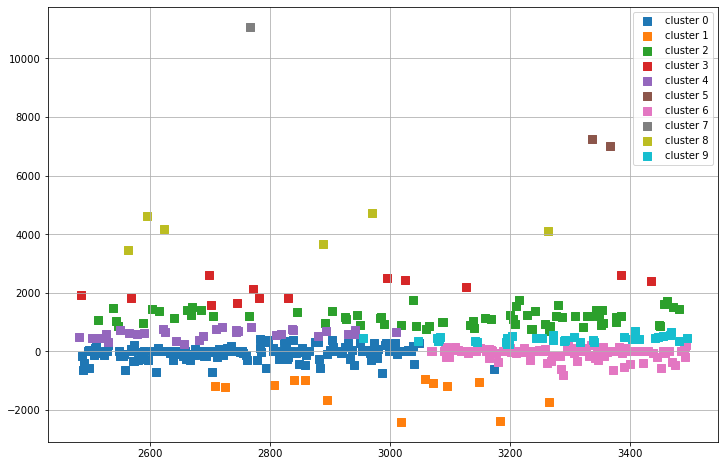

In [415]:
plot_clusters(X,y_hc)

In [ ]:

df = pd.DataFrame(dict(
    r=x,
    theta=['processing cost','mechanical properties','chemical stability',
           'thermal stability', 'device integration']))
fig = px.line_polar(twm_cus0, r='r', theta='theta', line_close=True)
fig.show()

In [64]:
twm_cus0_trim = twm_cus0.copy()
twm_cus0_trim1=twm_cus0_trim.drop(columns=['first_name', 'last_name','street_nbr','street_name', 'name_prefix','city_name', 'state_code', 'postal_code' ])


In [141]:
twm_cus0_trim2['income'].value_counts()

19639.0    2
12560.0    2
12072.0    2
44307.0    2
8038.0     2
          ..
14011.0    1
4187.0     1
14357.0    1
7777.0     1
8976.0     1
Name: income, Length: 639, dtype: int64

In [129]:
twm_cus0_trim2=twm_cus0_trim1.copy()

In [130]:
twm_cus0_trim2['income']= twm_cus0_trim1['income'].replace(0,np.NaN)

In [ ]:
twm_cus0

In [ ]:
#2. visualize the created clusters using [radar charts](https://plotly.com/python/radar-chart/) and compare them agains each other

In [ ]:
#3. visualize segmentations using scatter plot. We will have to use PCA to be able to plot our observations in 2D.

In [ ]:
#4. (stretch) visualize in 2D how our clusters are evolving in each iteration of KMeans (for at least 20 iterations).
   # - we will need to create own implementation of kmeans so we can see what is happening with the clusters during the iterations.